# Predicting Heart Disease
---
by Armando Fuentes, Chris Vaught, and Dayton White

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get the Data

In [2]:
#read in the data (Dayton's Computer Version)

data = pd.read_csv('heartdisease.csv')

In [3]:
#here, we see the data
data.head(20) 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Explore the Data

In [4]:
#statistics on raw data before manipulations
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#types all check out. no need to recode or cast as all numeric matches expectation
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
#as you can see, we have a few nulls here...
data.isnull().sum(axis = 0)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Categorical Analysis
* other categorical data is simply 1 and 0 or a binary indicator conveniently converted to numbers for machine learning to understand
* These values usually represent uncommon but serious conditions.
    * Some tend to be uncommon in the data, but common in those with heart disease in the data:

Text(0.5, 1.0, 'BP Meds in People with Heart Disease')

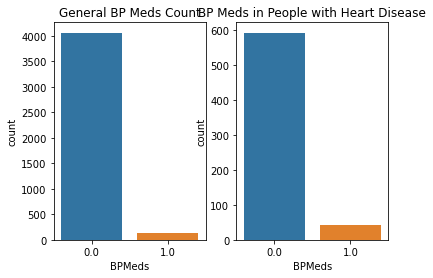

In [7]:
#BPMeds
plt.subplot(1, 2, 1) 
sns.countplot(x='BPMeds', data=data)
plt.title('General BP Meds Count')

temp = data.loc[data.TenYearCHD == 1,'BPMeds']
temp = pd.DataFrame(temp)

plt.subplot(1,2,2)
sns.countplot(x='BPMeds',data=temp)
plt.title('BP Meds in People with Heart Disease')

#BPMeds has a higher ratio in HD than in general population (all people)

Text(0.5, 1.0, 'Diabetes in People with Heart Disease')

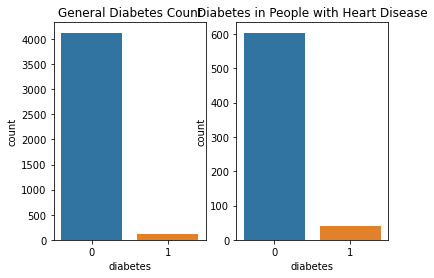

In [8]:
#Diabetes
plt.subplot(1,2,1)
sns.countplot(x='diabetes', data=data)
plt.title('General Diabetes Count')

temp = data.loc[data.TenYearCHD == 1,'diabetes']
temp = pd.DataFrame(temp)

plt.subplot(1,2,2)
sns.countplot(x='diabetes',data=temp)
plt.title('Diabetes in People with Heart Disease')

#Diabetes has a higher ratio in HD than in general population (all people)

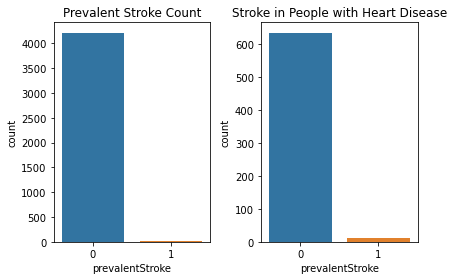

In [9]:
#Stroke
plt.subplot(1,2,1)
sns.countplot(x='prevalentStroke', data=data)
plt.title('Prevalent Stroke Count')

temp = data.loc[data.TenYearCHD == 1,'prevalentStroke']
temp = pd.DataFrame(temp)

plt.subplot(1,2,2)
sns.countplot(x='prevalentStroke',data=temp)
plt.title('Stroke in People with Heart Disease')

plt.tight_layout()
plt.show()

#stroke has a higher ratio in HD than in general population (all people)

#I propose we leave them in for now. They are serious conditions after all. Once we are tuning, we can revisit this

<AxesSubplot:>

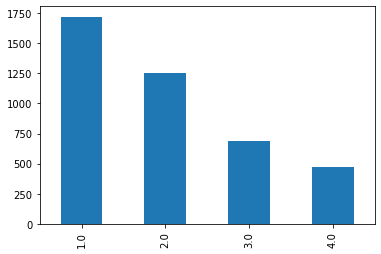

In [10]:
#For education, I believe it is best to treat it as a categorical feature
#likely means they did not finish high school (1), high school diploma (2), college degree (3), advanced degree (4) or similar
data['education'].value_counts().plot(kind="bar")

# Wrangle the Data

In [11]:
#so lets data wrangle by replacing the nulls with the medians and we can even normalize the data while we are at it!

#simple col retrieval is being big dumb so lets do this the hard way...
cols = data.columns #get the cols in at the very least an iterable format
featCols = list()
for x in cols: featCols.append(x) #populate our col list
    


#except we put ALL cols. we want to ONLY get the feature col
#WE want to handle a few categorical columns differently
featCols.remove('TenYearCHD')
featCols.remove('prevalentStroke')
featCols.remove('currentSmoker')
featCols.remove('prevalentHyp')
categorical = ['prevalentStroke','prevalentHyp']

featCols.remove('cigsPerDay') #well... ok this one is special and not categorical

features = featCols + categorical + ['cigsPerDay'] #just so we still have a list of ALL cols but anyways...

## Smoker
* so we indicate if someone is a smoker with the currentSmoker col
    * this means we have information that can help us to make a more accurate guess for fillna values!
* simply get the median for smokers and fill that for smokers, the nonsmokers can easily just be 0!
* we can very easily just take the median of smokers for the smokers 

In [12]:
data['cigsPerDay'] = data.loc[data.currentSmoker == 1,'cigsPerDay']\
.fillna(data.loc[data.currentSmoker == 1,'cigsPerDay'].median()) 

data.loc[data.currentSmoker == 0, 'cigsPerDay'] = 0 #setting nonsmokers null to 0

#at this point, this column is redundant, we already have all the smoker info we need
data.drop('currentSmoker', axis=1, inplace=True) 

In [13]:
#so now for some wrangling...
#loop through the featCols and just wrangle the data
for col in featCols: 
    data[col] = data[col].fillna(data[col].median()) #we want to fill NAs with median. Easy and effective way to solve that...
    
#but now for some categorical data... You cannot necessarily take a median for categorical since it is not numeric.
#A mode may be more appropriate?

for col in categorical:
    data[col] = data[col].fillna(data[col].mode())
    
data['education'].astype('int') #We wanna keep it as an int since it is a whole number and needs to stay that way for it to work

for col in features: data[col] = data[col] /data[col].abs().max() #and lastly, lets normalize everything

In [14]:
data.isnull().sum(axis = 0) #so now we our NAs are taken care of...

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
data.head(20) # and now we are not-null and normalized!

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.557143,1.00,0.000000,0.0,0.0,0.0,0.0,0.280172,0.359322,0.491228,0.474824,0.559441,0.195431,0
1,0.0,0.657143,0.50,0.000000,0.0,0.0,0.0,0.0,0.359195,0.410169,0.568421,0.505810,0.664336,0.192893,0
2,1.0,0.685714,0.25,0.285714,0.0,0.0,0.0,0.0,0.352011,0.432203,0.561404,0.446127,0.524476,0.177665,0
3,0.0,0.871429,0.75,0.428571,0.0,0.0,1.0,0.0,0.323276,0.508475,0.666667,0.503169,0.454545,0.261421,1
4,0.0,0.657143,0.75,0.328571,0.0,0.0,0.0,0.0,0.409483,0.440678,0.589474,0.406690,0.594406,0.215736,0
5,0.0,0.614286,0.50,0.000000,0.0,0.0,1.0,0.0,0.327586,0.610169,0.771930,0.533451,0.538462,0.251269,0
6,0.0,0.900000,0.25,0.000000,0.0,0.0,0.0,0.0,0.294540,0.467797,0.498246,0.582923,0.419580,0.215736,1
7,0.0,0.642857,0.50,0.285714,0.0,0.0,0.0,0.0,0.449713,0.338983,0.498246,0.381690,0.552448,0.197970,0
8,1.0,0.742857,0.25,0.000000,0.0,0.0,1.0,0.0,0.373563,0.479661,0.624561,0.464085,0.531469,0.200508,0
9,1.0,0.614286,0.25,0.428571,0.0,0.0,1.0,0.0,0.323276,0.549153,0.750877,0.415669,0.650350,0.223350,0


4238


<AxesSubplot:>

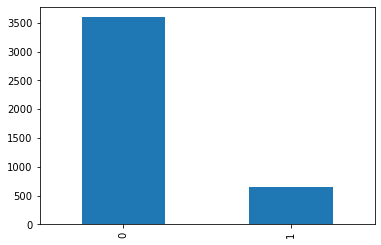

In [16]:
#ok so now the data is cleaned. Lets see what is going on here...
#We have quite a bit of 0s for our label and only a few 1s
#Not too many people have heart disease, but it still important we are able to predict it. 
print(len(data.index)) #we also have a decent amount of rows. Not a WHOLE lot but good enough
data['TenYearCHD'].value_counts().plot(kind="bar")

In [17]:
#With this being said, lets split with a test size of 33%

#first, we need to prep our inputs...
featDF = data[features] #select just the feature columns
labelDF = data['TenYearCHD'] #get the label col only

X_train, X_test, Y_train, Y_test = train_test_split(featDF, labelDF,test_size = .40, random_state=42)

#and now we are good to split!

# Identify Promising Models

In [18]:
#and our confusion matrix generator func
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Random Forest Classifier
* so now we need to set up the random forest classifier...
* random forest is a pretty good algo to use, and also we need a classifier because we are trying to predict yes or no for 
* heart disease. A regressor would not work since this is not numeric.
* We will test this along with a few other classifiers:

0.8567216981132075
Mean squared error: 0.14327830188679244
R-Squared: -0.1362935800052385
[[  19  232]
 [  11 1434]]
Confusion matrix, without normalization


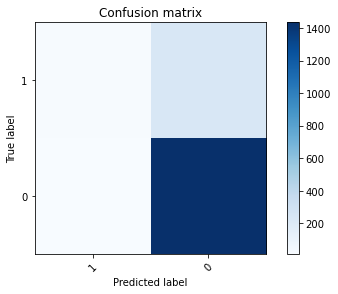

In [19]:
rfc = RandomForestClassifier(random_state = 42) #42 is the best number. Source: Dayton White 
rfc.fit(X_train,Y_train)

#and now lets test...
pred = rfc.predict(X_test)

#and now we look at the metrics to see how we did!
score = metrics.accuracy_score(Y_test,pred)
print(score)

# The mean squared error
mse = mean_squared_error(Y_test, pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, pred)
print('R-Squared:', r2)


cm = metrics.confusion_matrix(Y_test, pred, labels=[1, 0])
print(cm)


plot_confusion_matrix(cm, classes=[1, 0])

## Decision Tree Classifier
* Decision Tree is a more classic way to do things

0.8484669811320755
Mean squared error: 0.15153301886792453
R-Squared: -0.20175905375039638
[[  18  233]
 [  24 1421]]
Confusion matrix, without normalization


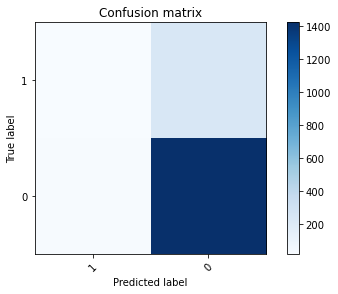

In [20]:

clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)

clf.fit(X_train,Y_train)

#and now lets test...
predCLF = clf.predict(X_test)

#and now we look at the metrics to see how we did!
score = metrics.accuracy_score(Y_test,predCLF)
print(score)

# The mean squared error
mse = mean_squared_error(Y_test, predCLF)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, predCLF)
print('R-Squared:', r2)


cm = metrics.confusion_matrix(Y_test, predCLF, labels=[1, 0])
print(cm)
plot_confusion_matrix(cm, classes=[1, 0])

## Multinomial NB
* NB is good for word processing, but worth a shot here

0.8514150943396226
Mean squared error: 0.14858490566037735
R-Squared: -0.17837852741284
[[   3  248]
 [   4 1441]]
Confusion matrix, without normalization


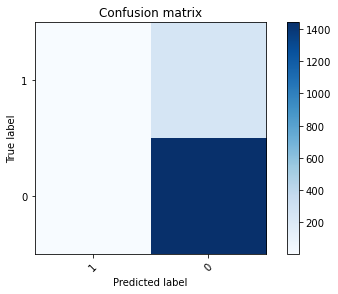

In [21]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)

predNB = nb.predict(X_test)

scoreNB = metrics.accuracy_score(Y_test,predNB)
print(scoreNB)

# The mean squared error
mse = mean_squared_error(Y_test, predNB)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, predNB)
print('R-Squared:', r2)


cm = metrics.confusion_matrix(Y_test, predNB, labels=[1, 0])
print(cm)
plot_confusion_matrix(cm, classes=[1, 0])

## SVC
* Finally just one more... This is the last classifier model type we know of...
* We actually do not know too much about this model, but it is worth checking also...

0.8531839622641509
Mean squared error: 0.14681603773584906
R-Squared: -0.16435021161030616
[[   4  247]
 [   2 1443]]
Confusion matrix, without normalization


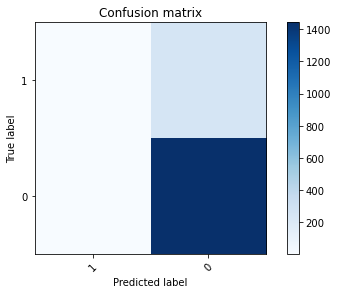

In [22]:

svc = SVC(random_state=42)

svc.fit(X_train,Y_train)

predSVC = svc.predict(X_test)

scoresvc = metrics.accuracy_score(Y_test,predSVC)
print(scoresvc)

# The mean squared error
mse = mean_squared_error(Y_test, predSVC)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, predSVC)
print('R-Squared:', r2)

cm = metrics.confusion_matrix(Y_test, predSVC, labels=[1, 0])
print(cm)
plot_confusion_matrix(cm, classes=[1, 0])

## After reviewing a bit, I would like to go with **Random Forest**
---

* Results are similar, but we know RF and DT are both good for this
* NB and SVC are either not the most appropriate type of model or we simply do not know much about it
* NB does not even have a lot of tuning capabilities. We would like more control over the tuning process
* RF has significantly better FN value than DT
    * It was truly neck and neck, so we could choose either one, but we feel more comfortable with a more robust model in RF

# Tune the Model

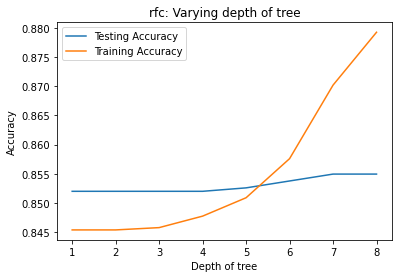

In [23]:
#so now lets tune the model a bit...

# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    rfc = RandomForestClassifier(max_depth = k, random_state = 42)

    # Fit the classifier to the training data
    rfc.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = rfc.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = rfc.score(X_test, Y_test)

# Generate plot
plt.title('rfc: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

#so as you can see, this model can be wayyyy overfitted if we are not careful! But luckily, and obvious maxDepth to use would be
#maxDepth = 5!

0.8537735849056604
Mean squared error: 0.14622641509433962
R-Squared: -0.15967410634279489
[[   4  247]
 [   1 1444]]
Confusion matrix, without normalization


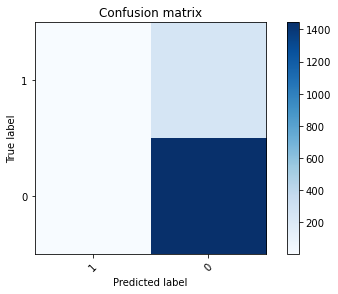

In [24]:
#lets try our model with the optimal max depth:
rfc = RandomForestClassifier(random_state = 42, max_depth=6)
rfc.fit(X_train,Y_train)

#and now lets test...
pred = rfc.predict(X_test)

#and now we look at the metrics to see how we did!
score = metrics.accuracy_score(Y_test,pred)
print(score)

# The mean squared error
mse = mean_squared_error(Y_test, pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, pred)
print('R-Squared:', r2)

cm = metrics.confusion_matrix(Y_test, pred, labels=[1, 0])
print(cm)


plot_confusion_matrix(cm, classes=[1, 0])

# Back to the Small Cat Feature Issue...
* Before we finalize the model, I want to try just one more thing for tuning and optimization. It involves feature selection
    * The features all looked very important, but some were interesting... 
* Some conditions neither prominent in general nor in people with heart disease. I left it because it just in case
    * Maybe now it would be best just to get rid of them and see what happens...

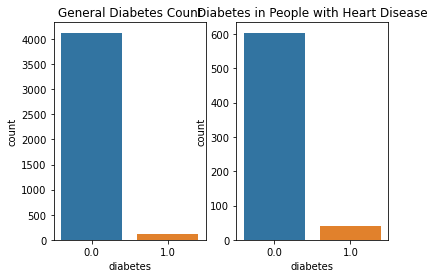

In [25]:
plt.subplot(1, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
sns.countplot(x='diabetes', data=data)
plt.title('General Diabetes Count')

temp = data.loc[data.TenYearCHD == 1,'diabetes']

temp = pd.DataFrame(temp)

plt.subplot(1,2,2)
sns.countplot(x='diabetes',data=temp)
plt.title('Diabetes in People with Heart Disease')

plt.show()

In [26]:
tempFeats = featDF.drop(['diabetes','BPMeds','prevalentStroke'], axis=1, inplace=False)

xtr, xte, ytr, yte = train_test_split(tempFeats, labelDF,test_size = .40, random_state=42) #and now we are good to split!
#ok so lets see...


rfc = RandomForestClassifier(random_state = 42, max_depth = 6) 
rfc.fit(xtr,ytr)

#and now lets test...
pred = rfc.predict(xte)

#and now we look at the metrics to see how we did!
score = metrics.accuracy_score(yte,pred)

# But as you can see, the model does not change significantly! Removing the smaller only features slightly improved our model. 
* They were potentially causing noise
* The confusion matrix also changed but insignificantly
* R-squared is up
* While leaving out these features in did not drastically alter results, it may be worth keeping them out if they had no real significance to begin with

0.8537735849056604
Mean squared error: 0.14622641509433962
R-Squared: -0.15967410634279489
[[   5  246]
 [   2 1443]]
Confusion matrix, without normalization


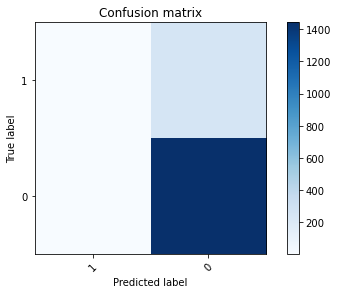

In [27]:
print(score)
# The mean squared error
mse = mean_squared_error(yte, pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(yte, pred)
print('R-Squared:', r2)

cm = metrics.confusion_matrix(yte, pred, labels=[1, 0])
print(cm)
plot_confusion_matrix(cm, classes=[1, 0])

# Present Solution

* The solution works pretty well. We were able to achieve a reasonably accurate model without overfitting
* Some features did not work; preferably would want more features of importance
* We assumed that the dataset was truthful and accurate to the situation
* There were no real surprises with this dataset. I was not expecting chronic conditions to be incredibly unimportant. I assumed they would have at least some significance, but they were ultimately dropped
* Limitations: We were limited to a relatively small dataset. A bigger one with a more balanced pool of labels (more 1s) would be beneficial

Accuracy: 0.8484669811320755
Mean squared error: 0.15153301886792453
R-Squared: -0.18305463268035127
[[   5  254]
 [   3 1434]]
Confusion matrix, without normalization


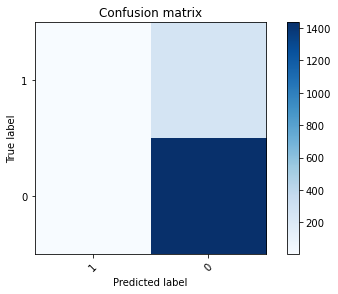

In [28]:
#so now lets do this for real!
xtr, xte, ytr, yte = train_test_split(tempFeats, labelDF,test_size = .40) #and now we are good to split!
#ok so lets see...

rfc = RandomForestClassifier(max_depth = 5) 
rfc.fit(xtr,ytr)

#and now lets test...
pred = rfc.predict(xte)

#and now we look at the metrics to see how we did!
score = metrics.accuracy_score(yte,pred)
print('Accuracy:',score)
# The mean squared error
mse = mean_squared_error(yte, pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_test, pred)
print('R-Squared:', r2)

cm = metrics.confusion_matrix(yte, pred, labels=[1, 0])
print(cm)
plot_confusion_matrix(cm, classes=[1, 0])